<a href="https://colab.research.google.com/github/shirish-baral/machine-learning-with-python/blob/main/Activity2_22054085_c9398_CSE47.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression:
  Accuracy: 0.8798
  F1 Score: 0.8797

K-Nearest Neighbors:
  Accuracy: 0.8807
  F1 Score: 0.8807

Naive Bayes:
  Accuracy: 0.8553
  F1 Score: 0.8553

Decision Tree:
  Accuracy: 0.9398
  F1 Score: 0.9398

Support Vector Machine:
  Accuracy: 0.8847
  F1 Score: 0.8845



<Figure size 1000x500 with 0 Axes>

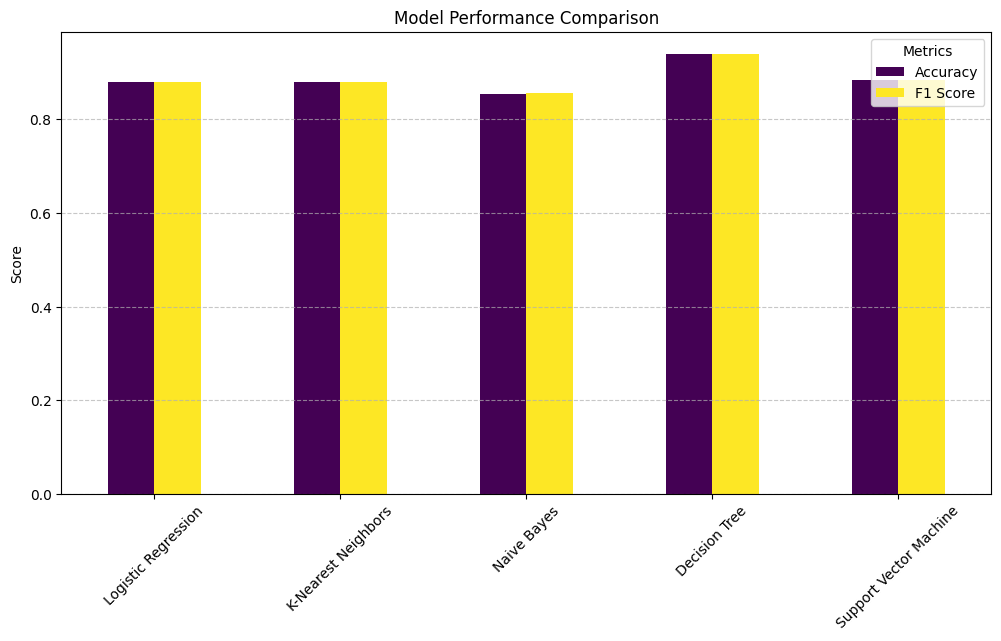

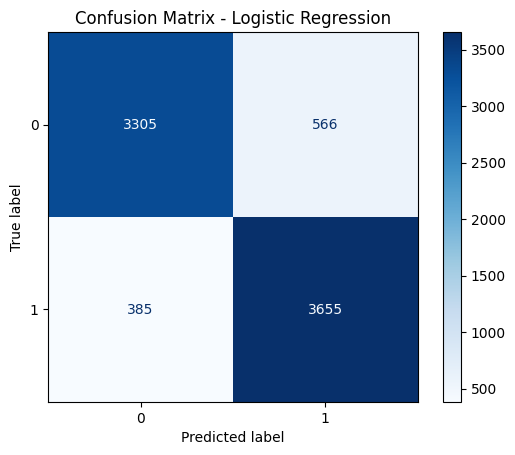

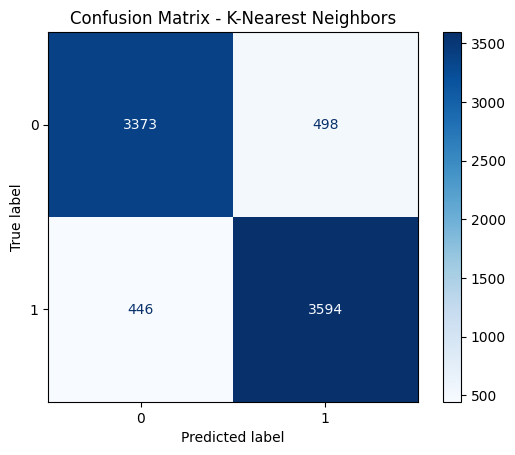

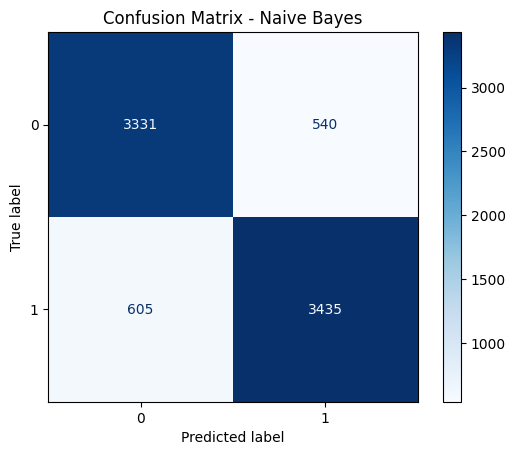

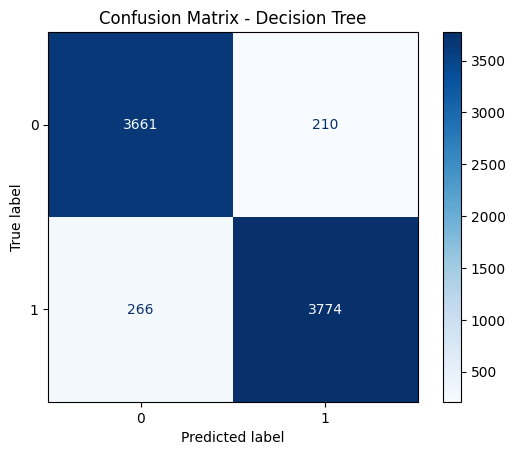

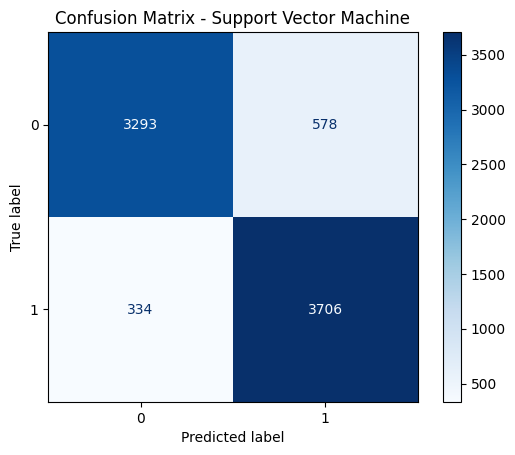

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
data = pd.read_csv('Classification Data.csv')

# Handle missing values (replace '?' with NaN and drop rows with missing values)
data = data.replace('?', np.nan).dropna()

# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split features and target
X = data.drop('TargetClass', axis=1)
y = data['TargetClass']

# Standardize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Train and evaluate models
results = {}
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Print results
for model, scores in results.items():
    print(f"{model}:")
    print(f"  Accuracy: {scores['Accuracy']:.4f}")
    print(f"  F1 Score: {scores['F1 Score']:.4f}")
    print()

# Visualization
plt.figure(figsize=(10, 5))
metrics_df = pd.DataFrame(results).T  # Convert results to DataFrame
metrics_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display confusion matrices
for model_name, cm in conf_matrices.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
